In [83]:
#import sys
#!{sys.executable} -m pip install sklearn

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
CardiovascularDS = pd.read_csv('./CardiovascularDisease.csv',sep=";")
CardiovascularDS.head()


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

The Problem Statement:
To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.

In [85]:
CardiovascularDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [86]:
CardiovascularDS.drop("id",axis=1,inplace=True)

In [87]:
print("There is {} missing values in data frame".format(CardiovascularDS.isnull().sum().sum()))
CardiovascularDS.isnull().sum()

There is 0 missing values in data frame


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [88]:
print("There is {} duplicated values in data frame".format(CardiovascularDS.duplicated().sum()))

There is 24 duplicated values in data frame


In [89]:
CardiovascularDS.drop_duplicates(inplace=True)
print("There is {} duplicated values in data frame".format(CardiovascularDS.duplicated().sum()))

There is 0 duplicated values in data frame


In [90]:
CardiovascularDS.describe()

age        gender        height        weight         ap_hi  \
count  69976.000000  69976.000000  69976.000000  69976.000000  69976.000000   
mean   19468.950126      1.349648    164.359152     74.208519    128.820453   
std     2467.374620      0.476862      8.211218     14.397211    154.037729   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  69976.000000  69976.000000  69976.000000  69976.000000  69976.000000   
mean      96.636261      1.366997      1.226535      0.088159      0.053790   
std      188.504581      0.680333      0.572353      0.283528      0.225604   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  69976.000000  69976.000000  
mean       0.803718      0.499771  
std        0.397187      0.500004  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [91]:
CardiovascularDS.shape

(69976, 12)

In [92]:
# Rename columns to make features more clearly understood
CardiovascularDS.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 'alco': 'alcohol', 'cardio': 'cardiovascular disease'}, inplace=True)

In [93]:
CardiovascularDS.head()

age  gender  height  weight  systolic  diastolic  cholesterol  glucose  \
0  18393       2     168    62.0       110         80            1        1   
1  20228       1     156    85.0       140         90            3        1   
2  18857       1     165    64.0       130         70            3        1   
3  17623       2     169    82.0       150        100            1        1   
4  17474       1     156    56.0       100         60            1        1   

   smoke  alcohol  active  cardiovascular disease  
0      0        0       1                       0  
1      0        0       1                       1  
2      0        0       0                       1  
3      0        0       1                       1  
4      0        0       0                       0

To Identify Gender (Male ,Female) , we will check the High and Alcohole features , as Male are more hight than femal and dring more alchohle than female

In [94]:
CardiovascularDS.groupby('gender')['height'].mean()

gender
1    161.354347
2    169.948134
Name: height, dtype: float64

In [95]:
CardiovascularDS.groupby('gender')['alcohol'].sum()

gender
1    1161
2    2603
Name: alcohol, dtype: int64

In [96]:
#To see how the target class is distributed among men and women, we can use also crosstab

pd.crosstab(CardiovascularDS['cardiovascular disease'],CardiovascularDS['gender'],normalize=True)

gender                         1         2
cardiovascular disease                    
0                       0.327241  0.172988
1                       0.323111  0.176661

2 Is Male and 1 is female

In [97]:
# Extact a new feild Year  from age feild, where the age represent number of days

CardiovascularDS['age_year'] = (CardiovascularDS['age'] / 365).round().astype('int')

In [98]:
CardiovascularDS.head()

age  gender  height  weight  systolic  diastolic  cholesterol  glucose  \
0  18393       2     168    62.0       110         80            1        1   
1  20228       1     156    85.0       140         90            3        1   
2  18857       1     165    64.0       130         70            3        1   
3  17623       2     169    82.0       150        100            1        1   
4  17474       1     156    56.0       100         60            1        1   

   smoke  alcohol  active  cardiovascular disease  age_year  
0      0        0       1                       0        50  
1      0        0       1                       1        55  
2      0        0       0                       1        52  
3      0        0       1                       1        48  
4      0        0       0                       0        48

In [99]:

# According to US National Library of Medicine National Institutes of Health the age groups are classified
def age_category(age):
  if 0 < age <= 2:
    return "Infants"
  elif 2 < age <= 5:
    return "Pre School Child"
  elif 5 < age <= 12:
    return "Child"
  elif 12 < age <= 19:
    return "Adolescent"
  elif 19 < age <= 24:
    return "Young Adult"
  elif 24 < age <= 44:
    return "Adult"
  elif 44 < age <= 65:
    return "Middle Aged"
  elif 65 < age:
    return "Aged"


In [100]:

def age_tees_categorize(age):
  if 0 < age <= 10:
    return "10s"
  elif 10 < age <= 30:
    return "20s"
  elif 20 < age <= 30:
    return "30s"
  elif 30 < age <= 40:
    return "40s"
  elif 40 < age <= 50:
    return "50s"
  elif 50 < age <= 60:
    return "60s"
  elif 60 < age <= 70:
    return "70+"

In [101]:
def cardiovasculardisease_categorize(v_cardiovasculardisease):
  if v_cardiovasculardisease==0:
    return "Not Have CVD"
  elif v_cardiovasculardisease==1:
    return "Have CVD"
  

In [102]:
def gender_categorize(v_gender):
  if v_gender==2:
    return "Male"
  elif v_gender==1:
    return "Female"

In [103]:
def smoke_categorize(v_smoke):
  if v_smoke==0:
    return "Not a Smoker"
  elif v_smoke==1:
    return "Smoker"

In [104]:
def alchoalic_categorize(v_alchoalic):
  if v_alchoalic==0:
    return "Not a Alchoalic"
  elif v_alchoalic==1:
    return "Alchoalic"

In [105]:
def Glucose_categorize(v_Glucose):
  if v_Glucose==1:
    return "normal"
  elif v_Glucose==2:
    return "above normal"
  elif v_Glucose==3:
    return "well above normal"

In [106]:
def cholesterol_categorize(v_cholesterol):
  if v_cholesterol==1:
    return "normal"
  elif v_cholesterol==2:
    return "above normal"
  elif v_cholesterol==3:
    return "well above normal"

In [107]:
def Active_categorize(v_active):
  if v_active==0:
    return "Not involved in Physical Activites'"
  elif v_active==1:
    return "involved in physical activites'"
  

In [108]:
CardiovascularDS['age_cat'] = CardiovascularDS['age_year'].apply(lambda x: age_category(x))
CardiovascularDS['age_tees'] = CardiovascularDS['age_year'].apply(lambda x: age_tees_categorize(x))
CardiovascularDS.head()

age  gender  height  weight  systolic  diastolic  cholesterol  glucose  \
0  18393       2     168    62.0       110         80            1        1   
1  20228       1     156    85.0       140         90            3        1   
2  18857       1     165    64.0       130         70            3        1   
3  17623       2     169    82.0       150        100            1        1   
4  17474       1     156    56.0       100         60            1        1   

   smoke  alcohol  active  cardiovascular disease  age_year      age_cat  \
0      0        0       1                       0        50  Middle Aged   
1      0        0       1                       1        55  Middle Aged   
2      0        0       0                       1        52  Middle Aged   
3      0        0       1                       1        48  Middle Aged   
4      0        0       0                       0        48  Middle Aged   

  age_tees  
0      50s  
1      60s  
2      60s  
3      50s  
4      50s

In [109]:
CardiovascularDS['CVD_cat'] = CardiovascularDS['cardiovascular disease'].apply(lambda x: cardiovasculardisease_categorize(x))
CardiovascularDS['Gender_cat'] = CardiovascularDS['gender'].apply(lambda x: gender_categorize(x))
CardiovascularDS['smoke_cat'] = CardiovascularDS['smoke'].apply(lambda x: smoke_categorize(x))
CardiovascularDS['alchoalic_cat'] = CardiovascularDS['alcohol'].apply(lambda x: alchoalic_categorize(x))
CardiovascularDS['Glucose_cat'] = CardiovascularDS['glucose'].apply(lambda x: Glucose_categorize(x))
CardiovascularDS['cholesterol_cat'] = CardiovascularDS['cholesterol'].apply(lambda x: cholesterol_categorize(x))
CardiovascularDS.head()

age  gender  height  weight  systolic  diastolic  cholesterol  glucose  \
0  18393       2     168    62.0       110         80            1        1   
1  20228       1     156    85.0       140         90            3        1   
2  18857       1     165    64.0       130         70            3        1   
3  17623       2     169    82.0       150        100            1        1   
4  17474       1     156    56.0       100         60            1        1   

   smoke  alcohol  ...  cardiovascular disease  age_year      age_cat  \
0      0        0  ...                       0        50  Middle Aged   
1      0        0  ...                       1        55  Middle Aged   
2      0        0  ...                       1        52  Middle Aged   
3      0        0  ...                       1        48  Middle Aged   
4      0        0  ...                       0        48  Middle Aged   

  age_tees       CVD_cat Gender_cat     smoke_cat    alchoalic_cat  \
0      50s  Not Have CVD       Male  Not a Smoker  Not a Alchoalic   
1      60s      Have CVD     Female  Not a Smoker  Not a Alchoalic   
2      60s      Have CVD     Female  Not a Smoker  Not a Alchoalic   
3      50s      Have CVD       Male  Not a Smoker  Not a Alchoalic   
4      50s  Not Have CVD     Female  Not a Smoker  Not a Alchoalic   

  Glucose_cat    cholesterol_cat  
0      normal             normal  
1      normal  well above normal  
2      normal  well above normal  
3      normal             normal  
4      normal             normal  

[5 rows x 21 columns]

In [110]:
CardiovascularDS['active_cat'] = CardiovascularDS['active'].apply(lambda x: Active_categorize(x))
CardiovascularDS.head()

age  gender  height  weight  systolic  diastolic  cholesterol  glucose  \
0  18393       2     168    62.0       110         80            1        1   
1  20228       1     156    85.0       140         90            3        1   
2  18857       1     165    64.0       130         70            3        1   
3  17623       2     169    82.0       150        100            1        1   
4  17474       1     156    56.0       100         60            1        1   

   smoke  alcohol  ...  age_year      age_cat  age_tees       CVD_cat  \
0      0        0  ...        50  Middle Aged       50s  Not Have CVD   
1      0        0  ...        55  Middle Aged       60s      Have CVD   
2      0        0  ...        52  Middle Aged       60s      Have CVD   
3      0        0  ...        48  Middle Aged       50s      Have CVD   
4      0        0  ...        48  Middle Aged       50s  Not Have CVD   

  Gender_cat     smoke_cat    alchoalic_cat Glucose_cat    cholesterol_cat  \
0       Male  Not a Smoker  Not a Alchoalic      normal             normal   
1     Female  Not a Smoker  Not a Alchoalic      normal  well above normal   
2     Female  Not a Smoker  Not a Alchoalic      normal  well above normal   
3       Male  Not a Smoker  Not a Alchoalic      normal             normal   
4     Female  Not a Smoker  Not a Alchoalic      normal             normal   

                            active_cat  
0      involved in physical activites'  
1      involved in physical activites'  
2  Not involved in Physical Activites'  
3      involved in physical activites'  
4  Not involved in Physical Activites'  

[5 rows x 22 columns]

Filter out the following patient segments (we consider these as erroneous data)

diastolic pressure is higher than systolic
height is strictly less than 2.5 percentile (Use pd.Series.quantile to compute this value. If you are not familiar with the function, please read the docs.)
height is strictly more than 97.5 percentile
weight is strictly less than 2.5 percentile
weight is strictly more than 97.5 percentile

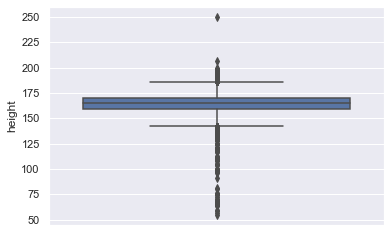

In [111]:
sns.boxplot( y=CardiovascularDS["height"] )

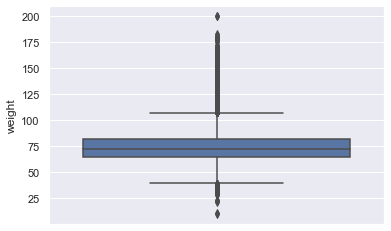

In [112]:
sns.boxplot( y=CardiovascularDS["weight"] )

In [113]:
CardiovascularDS.drop(CardiovascularDS[(CardiovascularDS['height'] > CardiovascularDS['height'].quantile(0.975)) | (CardiovascularDS['height'] < CardiovascularDS['height'].quantile(0.025))].index,inplace=True)
CardiovascularDS.drop(CardiovascularDS[(CardiovascularDS['weight'] > CardiovascularDS['weight'].quantile(0.975)) | (CardiovascularDS['weight'] < CardiovascularDS['weight'].quantile(0.025))].index,inplace=True)

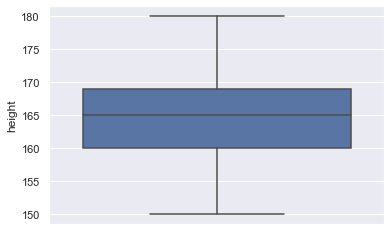

In [114]:
sns.boxplot( y=CardiovascularDS["height"] )

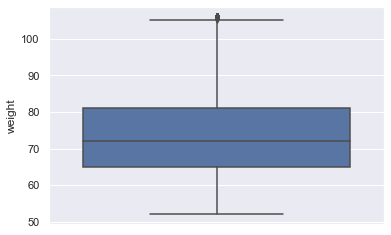

In [115]:
sns.boxplot( y=CardiovascularDS["weight"] )

For Systolic blood pressure , the range should be 120 - 180 mm.
For Diastolic blood pressure , the range should be 80 - 120 mm.

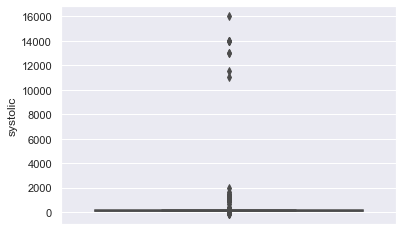

In [116]:
sns.boxplot( y=CardiovascularDS["systolic"] )

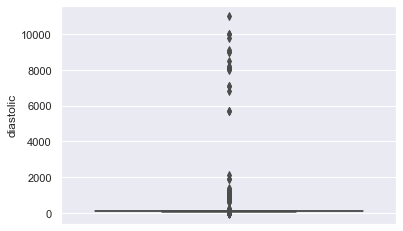

In [117]:
sns.boxplot( y=CardiovascularDS["diastolic"] )

In [118]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(CardiovascularDS[CardiovascularDS['diastolic']> CardiovascularDS['systolic']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [119]:
CardiovascularDS.drop(CardiovascularDS[CardiovascularDS['diastolic']> CardiovascularDS['systolic']].index,inplace=True)

'ap_hi': 'systolic', 'ap_lo': 'diastolic'

In [120]:
CardiovascularDS.drop(CardiovascularDS[(CardiovascularDS['systolic'] > CardiovascularDS['systolic'].quantile(0.975)) | (CardiovascularDS['systolic'] < CardiovascularDS['systolic'].quantile(0.025))].index,inplace=True)
CardiovascularDS.drop(CardiovascularDS[(CardiovascularDS['diastolic'] > CardiovascularDS['diastolic'].quantile(0.975)) | (CardiovascularDS['diastolic'] < CardiovascularDS['diastolic'].quantile(0.025))].index,inplace=True)

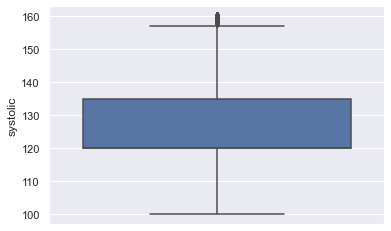

In [121]:
sns.boxplot( y=CardiovascularDS["systolic"] )

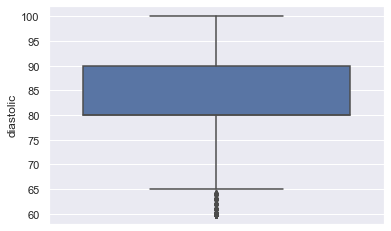

In [122]:
sns.boxplot( y=CardiovascularDS["diastolic"] )

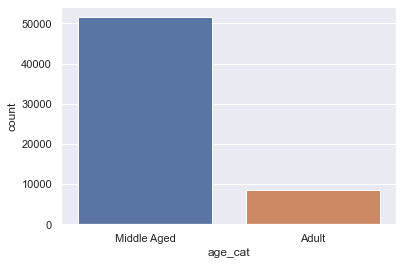

In [123]:
sns.countplot(x ='age_cat', data = CardiovascularDS) 

graph information : the dataset contains majorly of Middle Aged people data and minor of Adult data.

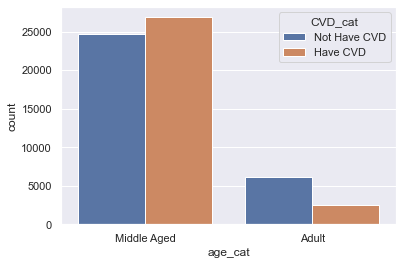

In [124]:
sns.countplot(x ='age_cat', hue = 'CVD_cat', data = CardiovascularDS) 

graph information :middle aged people are affected by Cardiovascular while comparing to Adult

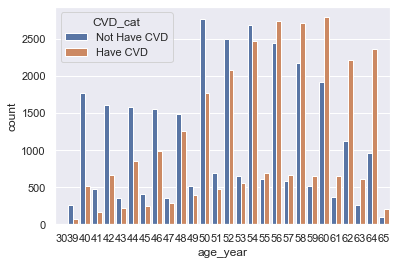

In [125]:
sns.countplot(x='age_year', data=CardiovascularDS, hue='CVD_cat')
plt.show()

graph information : people who are 55 greater in age are more exposed to Cardiovascular

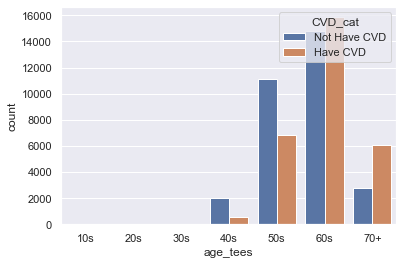

In [126]:
sns.countplot(x='age_tees', hue='CVD_cat', data = CardiovascularDS, order = ['10s','20s','30s','40s','50s','60s','70+']);

graph information :  60s and 70+ ages are more are more exposed to Cardiovascular compare to 40s and 50s.
In Addtion patient in 10s, 20s, 30s category have no Cardiovascular

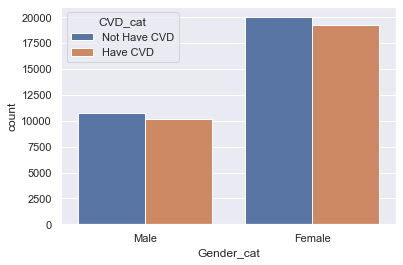

In [127]:
sns.countplot(x='Gender_cat', hue='CVD_cat', data = CardiovascularDS);

graph information : disease label is equally distributed but the gender population is not balanced .

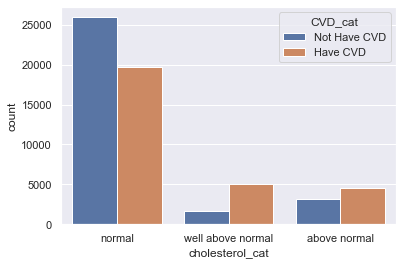

In [128]:
sns.countplot(x='cholesterol_cat', data=CardiovascularDS, hue='CVD_cat')
plt.show()

Graph Information : patients who are having above normal & well above normal are the highest risk patient for cardiovascular 

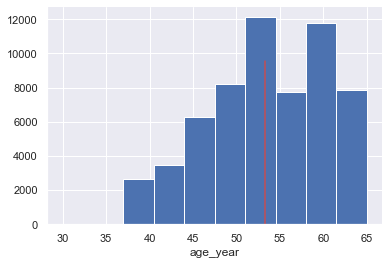

In [129]:
CardiovascularDS.age_year.hist()
plt.xlabel("age_year");
plt.axvline(CardiovascularDS.age_year.mean(), 0, 0.75, color='r', label='Mean')
sns.despine()

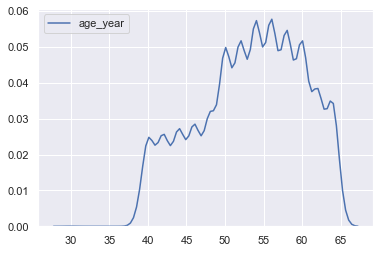

In [130]:
sns.kdeplot(CardiovascularDS.age_year);


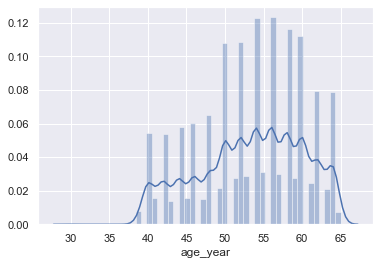

In [131]:
sns.distplot(CardiovascularDS.age_year);

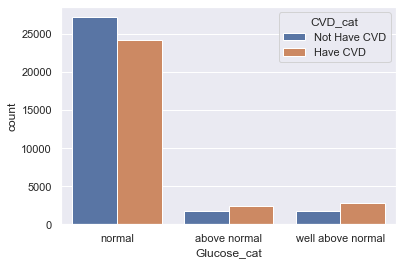

In [132]:
sns.countplot(x='Glucose_cat', data=CardiovascularDS, hue='CVD_cat')
plt.show()



Graph Information : normal glucose level and abnormal patients have high risk to cardiovascular.

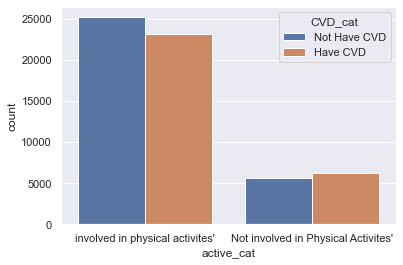

In [133]:
sns.countplot(x='active_cat', data=CardiovascularDS, hue='CVD_cat')
plt.show()

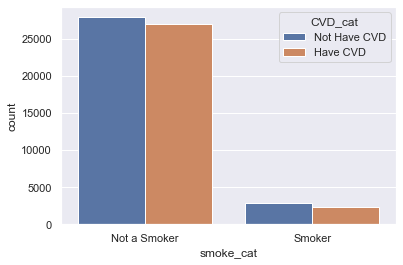

In [134]:
sns.countplot(x='smoke_cat', data=CardiovascularDS, hue='CVD_cat')
plt.show()

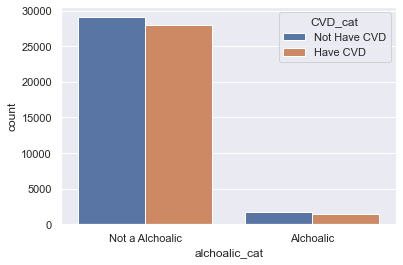

In [135]:
sns.countplot(x='alchoalic_cat', data=CardiovascularDS, hue='CVD_cat')
plt.show()

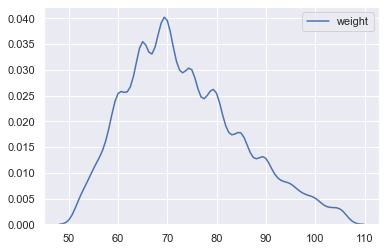

In [136]:
sns.kdeplot(CardiovascularDS.weight);

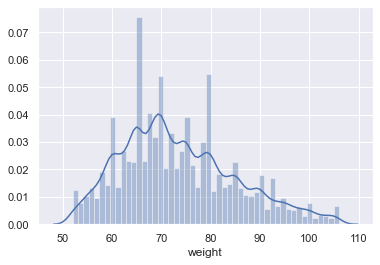

In [137]:
sns.distplot(CardiovascularDS.weight)
plt.show()

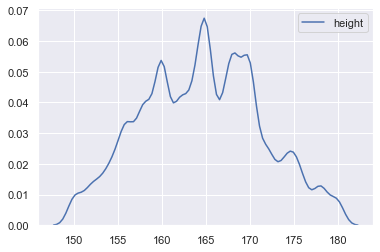

In [138]:
sns.kdeplot(CardiovascularDS.height);

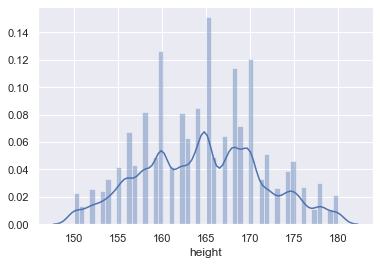

In [139]:
sns.distplot(CardiovascularDS.height)
plt.show()

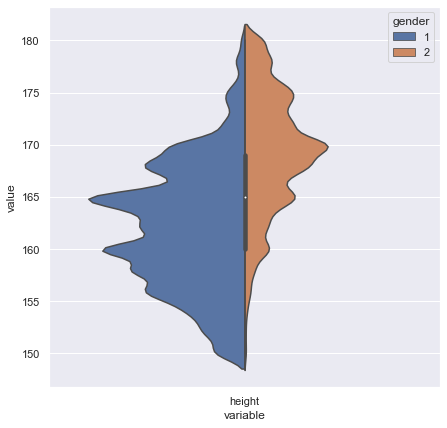

In [140]:
df_melt = pd.melt(frame=CardiovascularDS, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False);

graph information  : the height of 1- female and 2-male are slighlt variated where femal average is around 161 cm and male is around 169

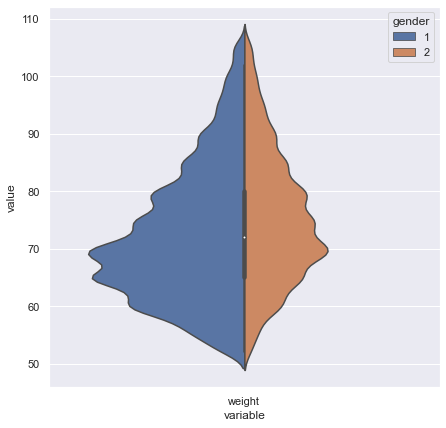

In [141]:
df_melt = pd.melt(frame=CardiovascularDS, value_vars=['weight'], id_vars=['gender'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False);

graph information  : weights both genders are equally distributed 

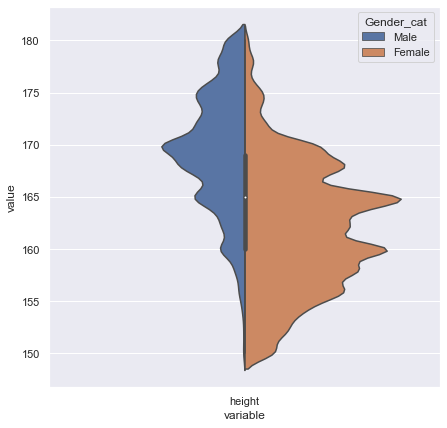

In [142]:
df_melt = pd.melt(frame=CardiovascularDS, value_vars=['height'], id_vars=['Gender_cat'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='Gender_cat', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False);

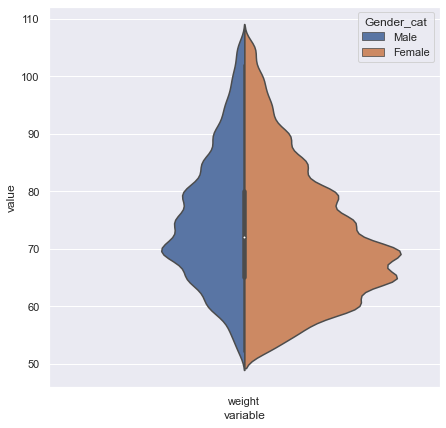

In [143]:
df_melt = pd.melt(frame=CardiovascularDS, value_vars=['weight'], id_vars=['Gender_cat'])
plt.figure(figsize=(7, 7))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='Gender_cat', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False);

calculate the BMI of the patients , the BMI says whether the person is in Normal health or not . 
BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared
Normal BMI values are said to be from 18.5 to 25.

In [144]:

# categorize normal & abnormal
def bmi_category(bmi_score):
  if 18.5 <= bmi_score <= 25:
    return "Normal"
  else:
    return "Abnormal"

In [145]:
# calculate the BMI score 
CardiovascularDS['BMI'] = CardiovascularDS['weight']/((CardiovascularDS['height']/100)**2)

CardiovascularDS["BMIStatus"] = CardiovascularDS["BMI"].apply(lambda x: bmi_category(x))


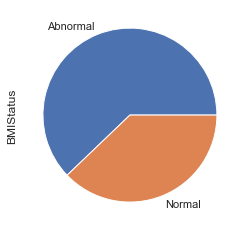

In [146]:
CardiovascularDS["BMIStatus"].value_counts().plot(kind='pie')

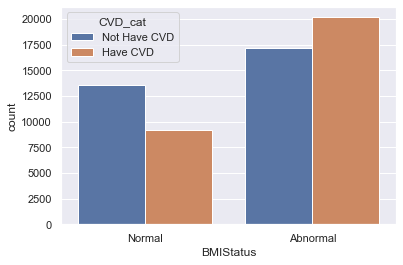

In [147]:
sns.countplot(x='BMIStatus', hue='CVD_cat', data = CardiovascularDS);

graph information : people who follows normal BMI score are less prone to cardiovascular 
and people with abnormal BMI are having increasing cardiovascular.

In [148]:
def categorize_blood_pressure(x):
  if x['systolic'] < 120 and x['diastolic'] < 80:
    return "Normal"
  elif 120 <= x['systolic'] <= 129 and x['diastolic'] < 80:
    return "Elevated"
  elif 130 <= x['systolic'] <= 139 or 80 <= x['diastolic'] <= 89:
    return "High Blood Pressure(Stage 1)"
  elif  140 <= x['systolic'] <= 180 or 90 <= x['diastolic'] <= 120:
    return "High Blood Pressure(Stage 2)"
  elif  (x['systolic'] > 180 and  x['diastolic'] > 120) or (x['systolic'] > 180 or x['diastolic'] > 120):
    return "Hypertensive Crisis"

In [149]:
def pulse(data):
    return np.subtract(data['systolic'], data['diastolic'])
 


In [150]:
CardiovascularDS['blood_category'] = CardiovascularDS.apply(categorize_blood_pressure, axis=1)

In [151]:
CardiovascularDS['pulse'] = CardiovascularDS.apply(pulse, axis=1)

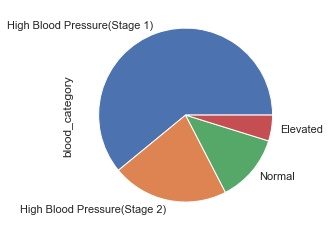

In [152]:
CardiovascularDS["blood_category"].value_counts().plot(kind='pie')


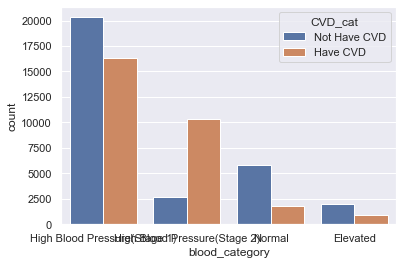

In [153]:
sns.countplot(x='blood_category', hue='CVD_cat', data = CardiovascularDS);

Graph Infor: high blood pressure are more subjected to Cardiovascular disease

In [154]:
CardiovascularDS.head()
CardiovascularDS.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60108 entries, 0 to 69999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     60108 non-null  int64  
 1   gender                  60108 non-null  int64  
 2   height                  60108 non-null  int64  
 3   weight                  60108 non-null  float64
 4   systolic                60108 non-null  int64  
 5   diastolic               60108 non-null  int64  
 6   cholesterol             60108 non-null  int64  
 7   glucose                 60108 non-null  int64  
 8   smoke                   60108 non-null  int64  
 9   alcohol                 60108 non-null  int64  
 10  active                  60108 non-null  int64  
 11  cardiovascular disease  60108 non-null  int64  
 12  age_year                60108 non-null  int64  
 13  age_cat                 60108 non-null  object 
 14  age_tees                60108 non-null

In [155]:
CardiovascularDS_DS = CardiovascularDS[["weight","height","systolic","diastolic","gender","age_tees","age_year","BMI","BMIStatus","cholesterol","alcohol","smoke","glucose","active","blood_category","pulse","cardiovascular disease"]].copy()
CardiovascularDS_DS.head()

weight  height  systolic  diastolic  gender age_tees  age_year        BMI  \
0    62.0     168       110         80       2      50s        50  21.967120   
1    85.0     156       140         90       1      60s        55  34.927679   
2    64.0     165       130         70       1      60s        52  23.507805   
3    82.0     169       150        100       2      50s        48  28.710479   
4    56.0     156       100         60       1      50s        48  23.011177   

  BMIStatus  cholesterol  alcohol  smoke  glucose  active  \
0    Normal            1        0      0        1       1   
1  Abnormal            3        0      0        1       1   
2    Normal            3        0      0        1       0   
3  Abnormal            1        0      0        1       1   
4    Normal            1        0      0        1       0   

                 blood_category  pulse  cardiovascular disease  
0  High Blood Pressure(Stage 1)     30                       0  
1  High Blood Pressure(Stage 2)     50                       1  
2  High Blood Pressure(Stage 1)     60                       1  
3  High Blood Pressure(Stage 2)     50                       1  
4                        Normal     40                       0

In [156]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# BMI_State
le.fit(CardiovascularDS_DS['BMIStatus'])
CardiovascularDS_DS['BMIStatus'] = le.transform(CardiovascularDS_DS['BMIStatus'])

# blood category
le.fit(CardiovascularDS_DS['blood_category'])
CardiovascularDS_DS['blood_category'] = le.transform(CardiovascularDS_DS['blood_category'])

# age tees
le.fit(CardiovascularDS_DS['age_tees'])
CardiovascularDS_DS['age_tees'] = le.transform(CardiovascularDS_DS['age_tees'])

CardiovascularDS_DS.head()

weight  height  systolic  diastolic  gender  age_tees  age_year        BMI  \
0    62.0     168       110         80       2         2        50  21.967120   
1    85.0     156       140         90       1         3        55  34.927679   
2    64.0     165       130         70       1         3        52  23.507805   
3    82.0     169       150        100       2         2        48  28.710479   
4    56.0     156       100         60       1         2        48  23.011177   

   BMIStatus  cholesterol  alcohol  smoke  glucose  active  blood_category  \
0          1            1        0      0        1       1               1   
1          0            3        0      0        1       1               2   
2          1            3        0      0        1       0               1   
3          0            1        0      0        1       1               2   
4          1            1        0      0        1       0               3   

   pulse  cardiovascular disease  
0     30                       0  
1     50                       1  
2     60                       1  
3     50                       1  
4     40                       0

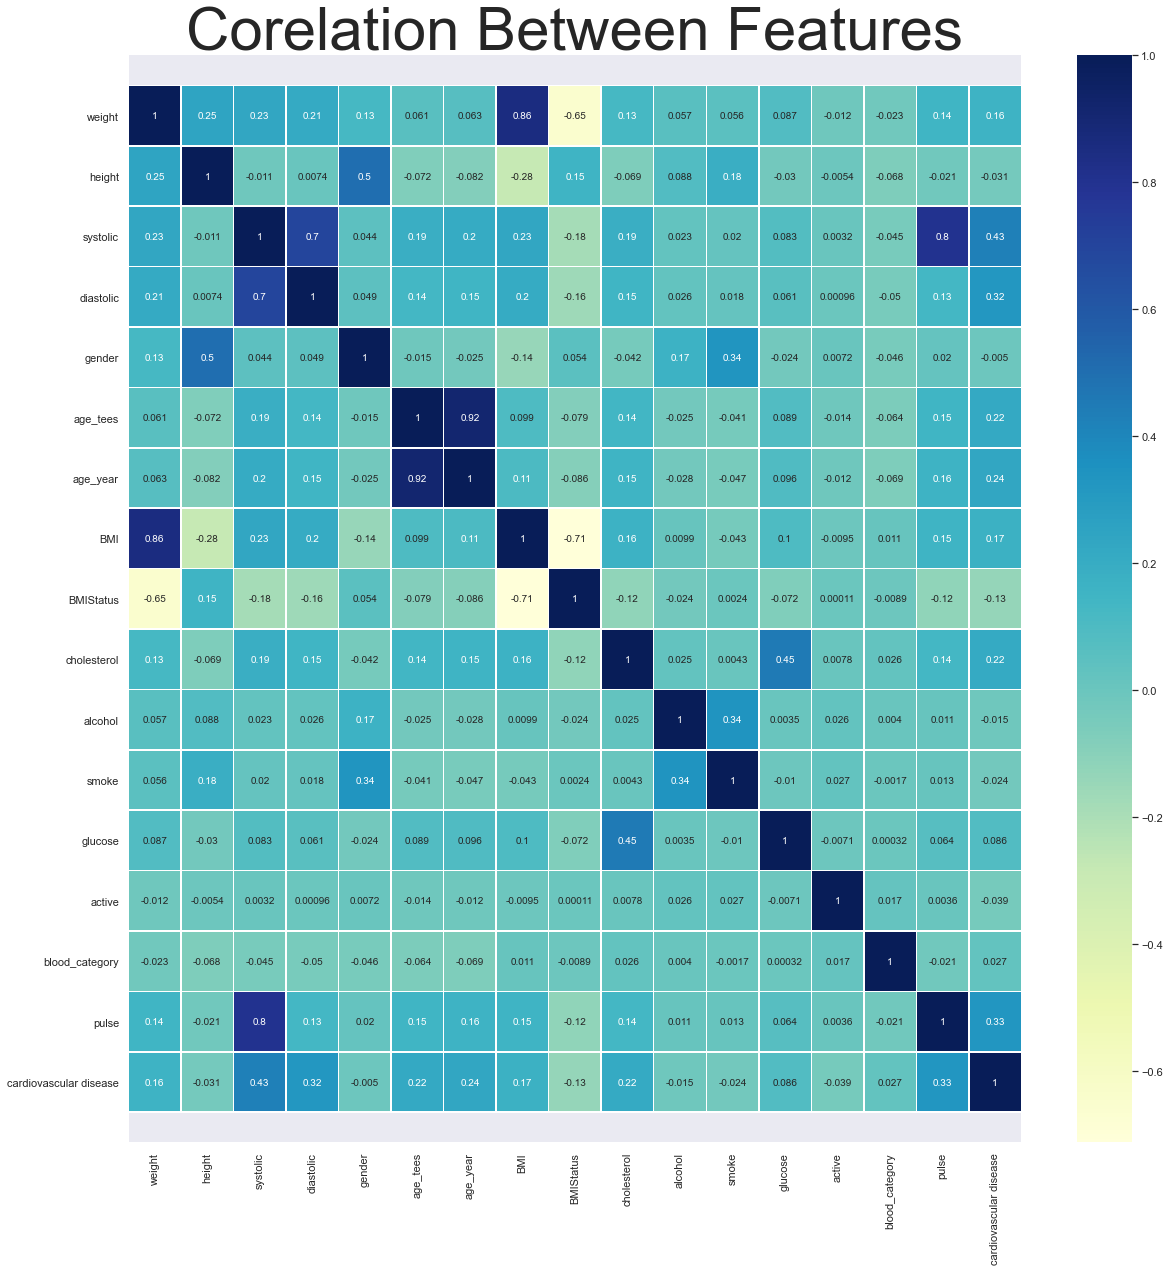

In [157]:


plt.rcParams['figure.figsize'] = (20, 20) 
ax=sns.heatmap(CardiovascularDS_DS.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +.5,top-.5)
plt.title('Corelation Between Features', fontsize = 60)
plt.show()

In [158]:
Final_CardiovascularDS_DS = CardiovascularDS_DS[["systolic","diastolic","age_year","cholesterol","pulse","cardiovascular disease"]].copy()
Final_CardiovascularDS_DS.head()


systolic  diastolic  age_year  cholesterol  pulse  cardiovascular disease
0       110         80        50            1     30                       0
1       140         90        55            3     50                       1
2       130         70        52            3     60                       1
3       150        100        48            1     50                       1
4       100         60        48            1     40                       0

In [159]:
x = Final_CardiovascularDS_DS.drop(['cardiovascular disease'], axis=1)
y = Final_CardiovascularDS_DS['cardiovascular disease']

In [160]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42, shuffle = True)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

size of test dataset = 12022, size of traing data = 48086, percentage = 20.000665468822785%


In [161]:
params = { 
    'n_estimators': [10, 50, 100, 150, 200, 300, 400, 500],
    'max_depth' : [10,20,30,40,50],
    'criterion' : ['entropy','gini']
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV# Hyperparameter Tuning
rfc_gridcv = RandomForestClassifier(random_state=42)
rfc_gridcv = GridSearchCV(estimator=rfc_gridcv, param_grid=params, cv= 10, n_jobs = -1)
rfc_gridcv.fit(x_train, y_train)
print("Best Hyper Parameters:\n",rfc_gridcv.best_params_)



In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth= 10, criterion = 'entropy')
model_rf.fit(x_train, y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)

print(ACC_train_rf)
print(ACC_test_rf)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [ ]:
params_for_l1 = { 
    'C' :  np.logspace(0, 4, 10),
    'solver' : ['liblinear', 'saga']
}

params_for_l2 = { 
    'C' :  np.logspace(0, 4, 10),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

params_for_elasticnet = { 
    'C' :  np.logspace(0, 4, 10),
    'l1_ratio' : np.arange (0.1, 1.0, 0.1),
    'solver' : ['saga']
}

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_with_l1_gridcv = LogisticRegression(penalty = 'l1')
logreg_with_l1_gridcv = GridSearchCV(estimator=logreg_with_l1_gridcv, param_grid=params_for_l1, cv= 10, n_jobs = -1)
logreg_with_l1_gridcv.fit(x_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_l1_gridcv.best_params_)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(penalty = 'l1', C = 1, solver = 'liblinear')
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr)
print(ACC_test_lr)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_with_l2_gridcv = LogisticRegression(penalty = 'l2')
logreg_with_l2_gridcv = GridSearchCV(estimator=logreg_with_l2_gridcv, param_grid=params_for_l2, cv= 10, n_jobs = -1)
logreg_with_l2_gridcv.fit(x_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_l2_gridcv.best_params_)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(penalty = 'l2', C = 1, solver = 'newton-cg')
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr)
print(ACC_test_lr)

In [ ]:
logreg_with_elasticnet_gridcv = LogisticRegression(penalty = 'elasticnet')
logreg_with_elasticnet_gridcv = GridSearchCV(estimator=logreg_with_elasticnet_gridcv, param_grid=params_for_elasticnet, cv= 10, n_jobs = -1)
logreg_with_elasticnet_gridcv.fit(x_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_elasticnet_gridcv.best_params_)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(penalty = 'elasticnet', C = 1, solver = 'saga',l1_ratio = 0.1)
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr)
print(ACC_test_lr)

In [ ]:
SVCparams = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001]}

In [ ]:
SVC_gridcv =  SVC()
SVC_gridcv = GridSearchCV(estimator=SVC_gridcv, param_grid=SVCparams, cv= 10, n_jobs = -1)
SVC_gridcv.fit(x_train, y_train)
print("Best Hyper Parameters:\n",SVC_gridcv.best_params_)

In [ ]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)

## Decision Trees
##from sklearn.tree import DecisionTreeClassifier 
##model_dt = DecisionTreeClassifier()
##model_dt.fit(x_train, y_train)
##ACC_train_dt = model_dt.score(x_train, y_train)
##ACC_test_dt = model_dt.score(x_test, y_test)

## Support Vector Machine
from sklearn.svm import SVC 
model_svm = SVC()
model_svm.fit(x_train, y_train)
ACC_train_svm = model_svm.score(x_train, y_train)
ACC_test_svm = model_svm.score(x_test, y_test)

## Support Vector Machine
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)

## Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
ACC_train_nb = model_nb.score(x_train, y_train)
ACC_test_nb = model_nb.score(x_test, y_test)

## Neural Network
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier()
model_nn.fit(x_train,y_train)
ACC_train_nn = model_nn.score(x_train,y_train)
ACC_test_nn = model_nn.score(x_test,y_test)


from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)'  , 'SVM (%)' , 'RF (%)', 'NB (%)', 'NN (%)'])
t.add_row(['Training', ACC_train_lr*100, ACC_train_svm*100, ACC_train_rf*100, ACC_train_nb*100,ACC_train_nn*100])
t.add_row(['Testing', ACC_test_lr*100, ACC_test_svm*100, ACC_test_rf*100, ACC_test_nb*100,ACC_train_nn*100])
print(t)

#from prettytable import PrettyTable
#t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)', 'NB (%)', 'NN (%)'])
#t.add_row(['Training', ACC_train_lr*100, ACC_train_dt*100, ACC_train_svm*100, ACC_train_rf*100, ACC_train_nb*100,ACC_train_nn*100])
#t.add_row(['Testing', ACC_test_lr*100, ACC_test_dt*100, ACC_test_svm*100, ACC_test_rf*100, ACC_test_nb*100,ACC_train_nn*100])
#print(t)

In [ ]:
#x = Final_CardiovascularDS_DS.drop(['cardiovascular disease'], axis=1)
#y = Final_CardiovascularDS_DS['cardiovascular disease']

from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 

from sklearn.model_selection import cross_val_score
cv_value = 10
##LR
from sklearn.linear_model import LogisticRegression
ACC_test_lr = cross_val_score(LogisticRegression(),x,y,cv = cv_value)

##DT
#from sklearn.tree import DecisionTreeClassifier
#ACC_test_dt = cross_val_score(DecisionTreeClassifier(),x,y,cv = cv_value)

##SVM
from sklearn.svm import SVC
ACC_test_svm = cross_val_score(SVC(),x,y,cv = cv_value)

##RF
from sklearn.ensemble import RandomForestClassifier
ACC_test_rf = cross_val_score(RandomForestClassifier(),x,y,cv = cv_value)

##NB
from sklearn.naive_bayes import GaussianNB
ACC_test_nb = cross_val_score(GaussianNB(),x,y,cv = cv_value)

ACC_test_lr_mean = np.mean(ACC_test_lr);
#ACC_test_dt_mean = np.mean(ACC_test_dt);
ACC_test_svm_mean = np.mean(ACC_test_svm);
ACC_test_rf_mean = np.mean(ACC_test_rf);
ACC_test_nb_mean = np.mean(ACC_test_nb);


from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)'  , 'SVM (%)' , 'RF (%)', 'NB (%)'])
t.add_row(['Testing', ACC_test_lr_mean*100, ACC_test_svm_mean*100, ACC_test_rf_mean*100, ACC_test_nb_mean*100])
print(t)

#from prettytable import PrettyTable
#t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)', 'NB (%)'])
#t.add_row(['Testing', ACC_test_lr_mean*100, ACC_test_dt_mean*100, ACC_test_svm_mean*100, ACC_test_rf_mean*100, ACC_test_nb_mean*100])
#print(t)

In our case :

True Positive : No of Cases Predicted with CVD and Actually had CVD
True Negative : No of Cases Predicted with No CVD and Actually had No CVD
False Positive : No of Cases Predicted with CVD and Actually had No CVD
False Negative : No of Cases Predicted with No CVD and Actually had CVD

In [ ]:
y_predict = model_lr.predict(x_test)
print(classification_report(y_test, y_predict))
print('LR True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('LR True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('LR False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('LR False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

In [ ]:
y_predict = model_svm.predict(x_test)
print(classification_report(y_test, y_predict))
print('SVM True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('SVM True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('SVM False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('SVM False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

In [ ]:
y_predict = model_rf.predict(x_test)
print(classification_report(y_test, y_predict))
print('RF True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('RF True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('RF False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('RF False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

In [ ]:
y_predict = model_nb.predict(x_test)
print(classification_report(y_test, y_predict))
print('NB True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('NB True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('NB False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('NB False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

In [ ]:
from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 
y_predict = model_nn.predict(x_test)
print(classification_report(y_test, y_predict))
print('NN True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('NN True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('NN False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('NN False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

In [ ]:
y_pred_prob = model_nn.predict_proba(x_test)

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score, f1_score 
print("Sensitivity (recall) score: ", recall_score(y_test,y_predict))
print("precision score: ", precision_score(y_test,y_predict))
print("f1 score: ", f1_score(y_test,y_predict))
print("accuracy score: ", accuracy_score(y_test,y_predict))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

We trained KNN, RandomForest and Logistic Regression with different penality and reveived almost similar results.

Here We dealing with a problem of a disease impacting a human health. So, We can't put someone's health in danger with our reckless decision

We need to have an accurate model.

In such cases, it's not a big threat if our model predict a Non CVD case as CVD (False Positive) because medical staff can later examine him/her.

But We can't risk of predicting a CVD case as Non CVD (False Negative) because in that case we'll be jeopardizing with that person's life.

Considering False Negative as a major factor, We will choose Random Forest as our model for the probelm since it's having the fine accuracy with Lower False Negative Cases

In [ ]:

from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)
y_predict = model_rf.predict(x_test)
print(classification_report(y_test, y_predict))
print('RF True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('RF True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('RF False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('RF False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth= 10, criterion = 'entropy')
model_rf.fit(x_train, y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)

print(ACC_train_rf)
print(ACC_test_rf)

y_predict = model_rf.predict(x_test)
print(classification_report(y_test, y_predict))
print('RF True Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][1]))
print('RF True Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][0]))
print('RF False Positive Cases : {}'.format(confusion_matrix(y_test, y_predict)[0][1]))
print('RF False Negative Cases : {}'.format(confusion_matrix(y_test, y_predict)[1][0]))

In [ ]:
CardiovascularDS_DS.head()

In [ ]:
Test_CardiovascularDS_DS = CardiovascularDS_DS[["weight","height","systolic","diastolic","age_year","cholesterol","alcohol","smoke","glucose","active","cardiovascular disease"]].copy()
Test_CardiovascularDS_DS.head()

In [ ]:
xx = Test_CardiovascularDS_DS.drop(['cardiovascular disease'], axis=1)
yy = Test_CardiovascularDS_DS['cardiovascular disease']

In [ ]:
from sklearn.model_selection import train_test_split

xx_train, xx_test, yy_train, yy_test = train_test_split(xx,yy,test_size=0.2,random_state=42, shuffle = True)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(xx_test),len(xx_train),len(xx_test)*100/(len(xx_test) + len(xx_train))))

In [ ]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier()
model_nn.fit(xx_train,yy_train)
ACC_train_nn = model_nn.score(xx_train,yy_train)
ACC_test_nn = model_nn.score(xx_test,yy_test)

print(ACC_train_nn)
print(ACC_test_nn)